Anggota 
- Azriel Naufal Aulia (1301190374)
- Adhie Rachmatullah Sugiono (1301194059)

## preprocessing

### prepare data

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('bmh')

In [143]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [144]:
#Panggil file (load file bernama Stock.csv) dan simpan dalam dataframe
dataset_train = "/content/drive/MyDrive/dataset exercise colab/kendaraan_train.csv"
dataset_test = "/content/drive/MyDrive/dataset exercise colab/kendaraan_test.csv"
dataTrain = pd.read_csv(dataset_train)
dataTest = pd.read_csv(dataset_test)

In [145]:
dataTrain.head(10)
# dataTrain.shape

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0
5,6,Pria,21.0,1.0,35.0,1.0,< 1 Tahun,Tidak,22735.0,152.0,171.0,0
6,7,Wanita,33.0,1.0,8.0,0.0,NaN,Pernah,32435.0,124.0,215.0,1
7,8,Pria,23.0,NaN,28.0,1.0,< 1 Tahun,Tidak,26869.0,152.0,222.0,0
8,9,Wanita,20.0,1.0,8.0,1.0,< 1 Tahun,Tidak,30786.0,160.0,31.0,0
9,10,NaN,54.0,1.0,29.0,0.0,> 2 Tahun,Pernah,88883.0,124.0,28.0,1


In [146]:
dataTest.head(10)
# dataTest.shape

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,49,1,8,0,1-2 Tahun,Pernah,46963,26,145,0
1,Pria,22,1,47,1,< 1 Tahun,Tidak,39624,152,241,0
2,Pria,24,1,28,1,< 1 Tahun,Tidak,110479,152,62,0
3,Pria,46,1,8,1,1-2 Tahun,Tidak,36266,124,34,0
4,Pria,35,1,23,0,1-2 Tahun,Pernah,26963,152,229,0
5,Pria,26,1,28,1,< 1 Tahun,Tidak,42721,152,198,0
6,Wanita,24,1,28,1,< 1 Tahun,Tidak,65801,152,160,0
7,Wanita,40,1,28,0,1-2 Tahun,Pernah,30981,26,79,0
8,Pria,23,1,15,1,< 1 Tahun,Tidak,32365,152,219,0
9,Wanita,43,1,28,0,1-2 Tahun,Pernah,65380,25,41,1


In [147]:
dataTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 285831 non-null  int64  
 1   Jenis_Kelamin      271391 non-null  object 
 2   Umur               271617 non-null  float64
 3   SIM                271427 non-null  float64
 4   Kode_Daerah        271525 non-null  float64
 5   Sudah_Asuransi     271602 non-null  float64
 6   Umur_Kendaraan     271556 non-null  object 
 7   Kendaraan_Rusak    271643 non-null  object 
 8   Premi              271262 non-null  float64
 9   Kanal_Penjualan    271532 non-null  float64
 10  Lama_Berlangganan  271839 non-null  float64
 11  Tertarik           285831 non-null  int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 26.2+ MB


In [148]:
dataTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47639 entries, 0 to 47638
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Jenis_Kelamin      47639 non-null  object
 1   Umur               47639 non-null  int64 
 2   SIM                47639 non-null  int64 
 3   Kode_Daerah        47639 non-null  int64 
 4   Sudah_Asuransi     47639 non-null  int64 
 5   Umur_Kendaraan     47639 non-null  object
 6   Kendaraan_Rusak    47639 non-null  object
 7   Premi              47639 non-null  int64 
 8   Kanal_Penjualan    47639 non-null  int64 
 9   Lama_Berlangganan  47639 non-null  int64 
 10  Tertarik           47639 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 4.0+ MB


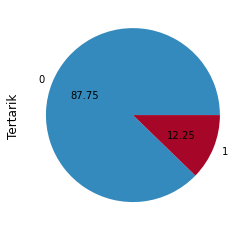

In [149]:
dataTrain['Tertarik'].value_counts().plot.pie(autopct='%.2f')

### drop column

#### drop unimportant column

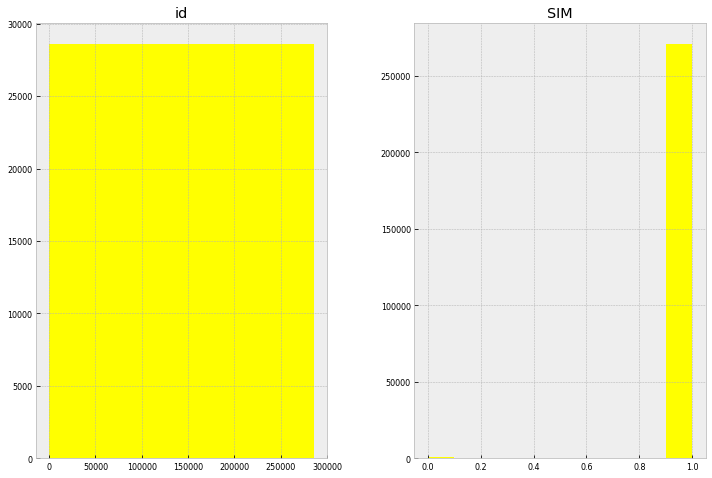

In [150]:
cols = ['id','SIM']
dataTrain[cols].hist(figsize=(12,8), bins=10, xlabelsize=8, ylabelsize=8, color='yellow');

In [151]:
dataTrain = dataTrain.drop(['id'], axis = 1)
# dataTrain = dataTrain.drop(['SIM'], axis = 1)

In [152]:
dataTrain.head(10)

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0
5,Pria,21.0,1.0,35.0,1.0,< 1 Tahun,Tidak,22735.0,152.0,171.0,0
6,Wanita,33.0,1.0,8.0,0.0,NaN,Pernah,32435.0,124.0,215.0,1
7,Pria,23.0,NaN,28.0,1.0,< 1 Tahun,Tidak,26869.0,152.0,222.0,0
8,Wanita,20.0,1.0,8.0,1.0,< 1 Tahun,Tidak,30786.0,160.0,31.0,0
9,NaN,54.0,1.0,29.0,0.0,> 2 Tahun,Pernah,88883.0,124.0,28.0,1


#### drop duplicate column

dataTraining

In [153]:
duplicate = list(dataTrain.duplicated())
print("DataTraining Duplikasi :", duplicate.count(True))

DataTraining Duplikasi : 169


In [154]:
dataTrain.drop_duplicates(inplace=True)

In [155]:
duplicate = list(dataTrain.duplicated())
print("DataTraining Duplikasi :", duplicate.count(True))

DataTraining Duplikasi : 0


#### drop missing values

dataTraining

In [156]:
dataTrain.isna().sum()

Jenis_Kelamin        14439
Umur                 14199
SIM                  14404
Kode_Daerah          14291
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14187
Premi                14510
Kanal_Penjualan      14297
Lama_Berlangganan    13926
Tertarik                 0
dtype: int64

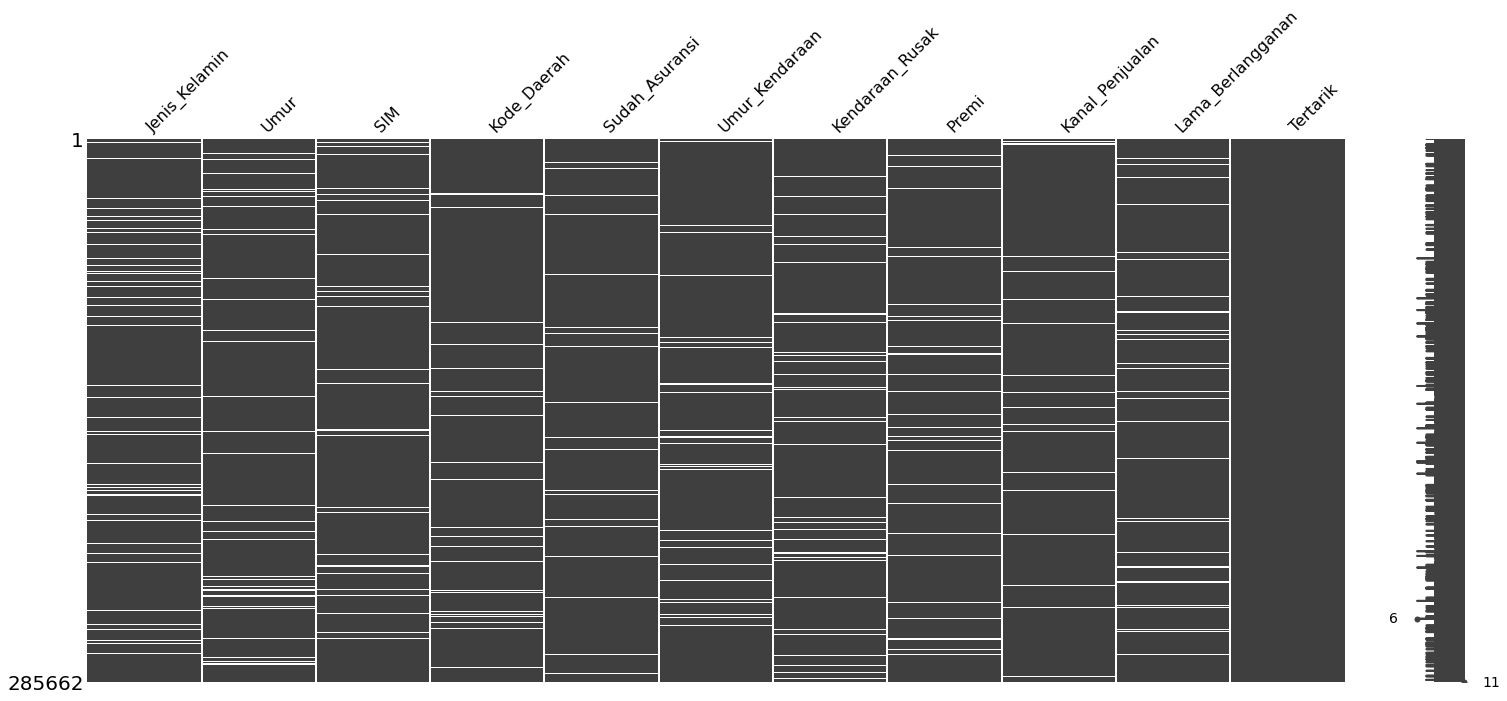

In [157]:
import missingno as msno

msno.matrix(dataTrain)

In [158]:
#Finding Missing values percentage in all columns
miss = pd.DataFrame(dataTrain.isnull().sum())
miss = miss.rename(columns={0:"miss_count"})
miss["miss_%"] = (miss.miss_count/len(dataTrain.index))*100
miss

,miss_count,miss_%
Jenis_Kelamin,14439,5.054575
Umur,14199,4.970560
SIM,14404,5.042323
Kode_Daerah,14291,5.002766
Sudah_Asuransi,14229,4.981062
Umur_Kendaraan,14275,4.997164
Kendaraan_Rusak,14187,4.966359
Premi,14510,5.079430
Kanal_Penjualan,14297,5.004866
Lama_Berlangganan,13926,4.874992


In [159]:
# menuliskan berapa banyak rows pada dataframe sebelum NaN value di drop
index = dataTrain.index
rows_before = len(index)
rows_before

285662

In [160]:
# drop data yang ada NaN value nya
dataTrain.dropna(inplace = True)
# reset index
dataTrain.reset_index(inplace=True,drop=True)
# show data
dataTrain.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
3,Pria,21.0,1.0,35.0,1.0,< 1 Tahun,Tidak,22735.0,152.0,171.0,0
4,Wanita,20.0,1.0,8.0,1.0,< 1 Tahun,Tidak,30786.0,160.0,31.0,0


In [161]:
# menuliskan berapa banyak rows pada dataframe setelah NaN value di drop
index = dataTrain.index
rows_after = len(index)
rows_after

171017

In [162]:
persentase_drop = ((rows_before - rows_after)/rows_before)*100
persentase_drop

40.13309435626719

dataTesting

In [163]:
dataTest.isna().sum()

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

### label encoder

In [164]:
# change kategorial into numerical value
from sklearn import preprocessing

In [165]:
dataTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171017 entries, 0 to 171016
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Jenis_Kelamin      171017 non-null  object 
 1   Umur               171017 non-null  float64
 2   SIM                171017 non-null  float64
 3   Kode_Daerah        171017 non-null  float64
 4   Sudah_Asuransi     171017 non-null  float64
 5   Umur_Kendaraan     171017 non-null  object 
 6   Kendaraan_Rusak    171017 non-null  object 
 7   Premi              171017 non-null  float64
 8   Kanal_Penjualan    171017 non-null  float64
 9   Lama_Berlangganan  171017 non-null  float64
 10  Tertarik           171017 non-null  int64  
dtypes: float64(7), int64(1), object(3)
memory usage: 14.4+ MB


In [166]:
# melihat berapa banyak total kategori pada jenis_kelamin, umur_kendaraan, kendaraan_rusak
cols = ['Jenis_Kelamin','Umur_Kendaraan','Kendaraan_Rusak']
dataTrain[cols].nunique()

Jenis_Kelamin      2
Umur_Kendaraan     3
Kendaraan_Rusak    2
dtype: int64

In [167]:
dataTest[cols].nunique()

Jenis_Kelamin      2
Umur_Kendaraan     3
Kendaraan_Rusak    2
dtype: int64

In [168]:
le = preprocessing.LabelEncoder()
dataTrain[cols] = dataTrain[cols].apply(le.fit_transform)
dataTest[cols] = dataTest[cols].apply(le.fit_transform)
###
# jenis kelamin : wanita/1 || pria/0
# umur kendaraan : < 1 tahun/1 || 1-2 tahun/0 || >2 tahun/2
# kendaraan rusak : tidak/1 || pernah/0
###

In [169]:
dataTrain.head(10)

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,30.0,1.0,33.0,1.0,1,1,28029.0,152.0,97.0,0
1,0,48.0,1.0,39.0,0.0,2,0,25800.0,29.0,158.0,0
2,1,58.0,1.0,48.0,0.0,0,1,2630.0,124.0,63.0,0
3,0,21.0,1.0,35.0,1.0,1,1,22735.0,152.0,171.0,0
4,1,20.0,1.0,8.0,1.0,1,1,30786.0,160.0,31.0,0
5,0,25.0,1.0,14.0,1.0,1,1,34212.0,152.0,282.0,0
6,0,66.0,1.0,24.0,1.0,0,1,38616.0,145.0,281.0,0
7,0,31.0,1.0,8.0,0.0,1,0,2630.0,152.0,132.0,0
8,1,24.0,1.0,30.0,1.0,1,1,27285.0,152.0,215.0,0
9,1,22.0,1.0,15.0,0.0,1,0,38289.0,152.0,225.0,0


In [170]:
dataTest.head(10)

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,49,1,8,0,0,0,46963,26,145,0
1,0,22,1,47,1,1,1,39624,152,241,0
2,0,24,1,28,1,1,1,110479,152,62,0
3,0,46,1,8,1,0,1,36266,124,34,0
4,0,35,1,23,0,0,0,26963,152,229,0
5,0,26,1,28,1,1,1,42721,152,198,0
6,1,24,1,28,1,1,1,65801,152,160,0
7,1,40,1,28,0,0,0,30981,26,79,0
8,0,23,1,15,1,1,1,32365,152,219,0
9,1,43,1,28,0,0,0,65380,25,41,1


### normalisasi

In [171]:
dataTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171017 entries, 0 to 171016
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Jenis_Kelamin      171017 non-null  int64  
 1   Umur               171017 non-null  float64
 2   SIM                171017 non-null  float64
 3   Kode_Daerah        171017 non-null  float64
 4   Sudah_Asuransi     171017 non-null  float64
 5   Umur_Kendaraan     171017 non-null  int64  
 6   Kendaraan_Rusak    171017 non-null  int64  
 7   Premi              171017 non-null  float64
 8   Kanal_Penjualan    171017 non-null  float64
 9   Lama_Berlangganan  171017 non-null  float64
 10  Tertarik           171017 non-null  int64  
dtypes: float64(7), int64(4)
memory usage: 14.4 MB


In [172]:
# normalisasi menggunakan formula normalisasi min - max
# fungsi manual
# def normalise_min_max(df):
#     return (df - df.min()) / (df.max() - df.min())
# library
from sklearn.preprocessing import MinMaxScaler

In [173]:
cols = ['Umur','Kode_Daerah','Premi','Kanal_Penjualan','Lama_Berlangganan']

# dataTrain = normalise_min_max(dataTrain[cols])

scaler = MinMaxScaler()

dataTrain[cols] = scaler.fit_transform(dataTrain[cols].values)
dataTrain.head(10)

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,0.153846,1.0,0.634615,1.0,1,1,0.047251,0.932099,0.301038,0
1,0,0.430769,1.0,0.750000,0.0,2,0,0.043104,0.172840,0.512111,0
2,1,0.584615,1.0,0.923077,0.0,0,1,0.000000,0.759259,0.183391,0
3,0,0.015385,1.0,0.673077,1.0,1,1,0.037402,0.932099,0.557093,0
4,1,0.000000,1.0,0.153846,1.0,1,1,0.052380,0.981481,0.072664,0
5,0,0.076923,1.0,0.269231,1.0,1,1,0.058753,0.932099,0.941176,0
6,0,0.707692,1.0,0.461538,1.0,0,1,0.066946,0.888889,0.937716,0
7,0,0.169231,1.0,0.153846,0.0,1,0,0.000000,0.932099,0.422145,0
8,1,0.061538,1.0,0.576923,1.0,1,1,0.045867,0.932099,0.709343,0
9,1,0.030769,1.0,0.288462,0.0,1,0,0.066338,0.932099,0.743945,0


In [174]:
dataTest[cols] = scaler.fit_transform(dataTest[cols].values)
dataTest.head(10)

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,0.446154,1,0.153846,0,0,0,0.082475,0.154321,0.467128,0
1,0,0.030769,1,0.903846,1,1,1,0.068822,0.932099,0.799308,0
2,0,0.061538,1,0.538462,1,1,1,0.200636,0.932099,0.179931,0
3,0,0.400000,1,0.153846,1,0,1,0.062575,0.759259,0.083045,0
4,0,0.230769,1,0.442308,0,0,0,0.045268,0.932099,0.757785,0
5,0,0.092308,1,0.538462,1,1,1,0.074583,0.932099,0.650519,0
6,1,0.061538,1,0.538462,1,1,1,0.117520,0.932099,0.519031,0
7,1,0.307692,1,0.538462,0,0,0,0.052743,0.154321,0.238754,0
8,0,0.046154,1,0.288462,1,1,1,0.055317,0.932099,0.723183,0
9,1,0.353846,1,0.538462,0,0,0,0.116737,0.148148,0.107266,1


### visualisasi data

#### korelasi

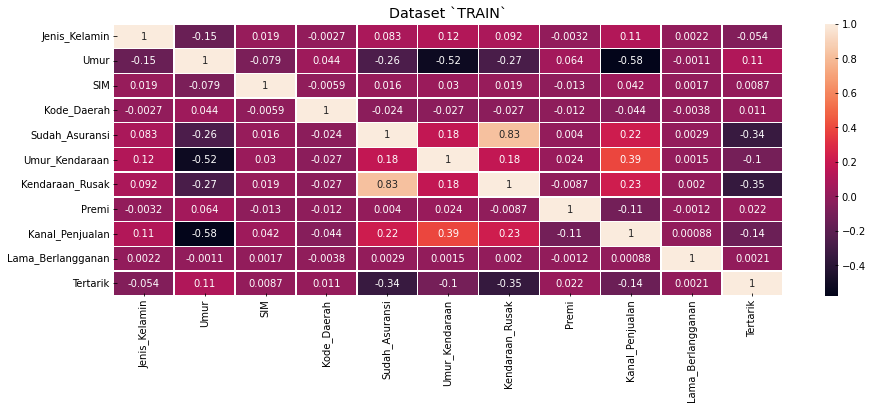

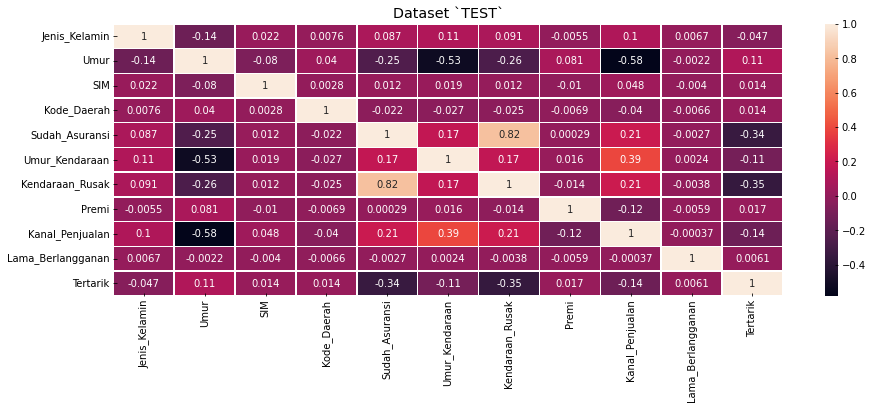

In [175]:
plt.figure(figsize=(15, 5))
sns.heatmap(dataTrain.corr(), annot = True,linewidths=.5)
plt.title("Dataset `TRAIN`" ,y=1.1)
plt.show()

plt.figure(figsize=(15, 5))
sns.heatmap(dataTest.corr(), annot = True,linewidths=.5)
plt.title("Dataset `TEST`" ,y=1.1)
plt.show()

#### outliers

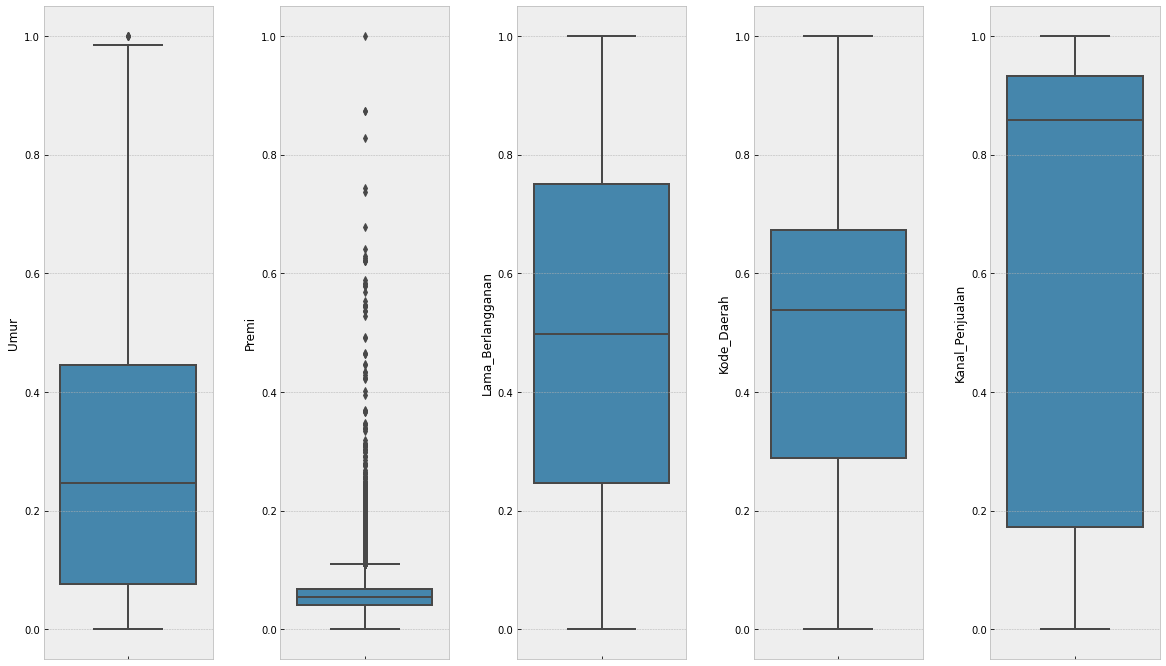

In [176]:
# membuat boxplot untuk melihat outliers, hanya pada kolom Premi, Umur, dan Lama_Berlangganan 
# (karena merupakan data numerik ~ diskrit / kontinu), sisanya merupakan kolom data kategorial.
f, axes = plt.subplots(1,5, figsize=(20,12), gridspec_kw={'wspace': 0.4, 'hspace':0.4})

sns.boxplot(y=dataTrain['Umur'], orient='v', ax=axes[0])
sns.boxplot(y=dataTrain['Premi'], orient='v', ax=axes[1])
sns.boxplot(y=dataTrain['Lama_Berlangganan'], orient='v', ax=axes[2])
sns.boxplot(y=dataTrain['Kode_Daerah'], orient='v', ax=axes[3])
sns.boxplot(y=dataTrain['Kanal_Penjualan'], orient='v', ax=axes[4])

In [177]:
# from scipy.stats import zscore
# from scipy import stats

In [178]:
# z_scores = stats.zscore(dataTrain['Umur'])

# abs_z_scores = np.abs(z_scores)
# filtered_entries = (abs_z_scores < 3)
# dataTrain = dataTrain[filtered_entries]

### imbalanced dataset


In [179]:
y = dataTrain['Tertarik']

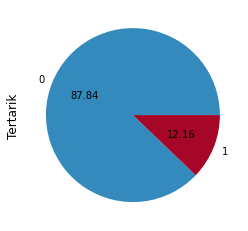

In [180]:
y.value_counts().plot.pie(autopct='%.2f')

In [181]:
temp_y = pd.DataFrame(y)
temp_y

,Tertarik
0,0
1,0
2,0
3,0
4,0
...,...
171012,0
171013,0
171014,0
171015,0


In [182]:
# pelanggan tertarik
iya = temp_y.apply(lambda x: True if x['Tertarik'] == 1 else False , axis=1)
# Count number of True in series
numOfRows = len(iya[iya == True].index)
print('Number of Rows in dataframe that tertarik is 1 : ', numOfRows)

Number of Rows in dataframe that tertarik is 1 :  20795


In [183]:
# pelanggan tidak tertarik
iya = temp_y.apply(lambda x: True if x['Tertarik'] == 0 else False , axis=1)
# Count number of True in series
numOfRows = len(iya[iya == True].index)
print('Number of Rows in dataframe that tertarik is 0 : ', numOfRows)

Number of Rows in dataframe that tertarik is 0 :  150222


**Kesimpulan** :<br> 
data cukup tidak seimbang antara label. dimana pelanggan yang tidak tertarik (label 'Tertarik' == 0) lebih banyak dari pelanggan yang tertarik. <br>
- tidak tertarik ~ 87.84 % / 150222 pelanggan <br>
- tertarik ~ 12.16 % / 20795 pelanggan

#### eksperimen random oversampling

In [184]:
from imblearn.over_sampling import RandomOverSampler

In [185]:
dataTrain = dataTrain.drop('Tertarik', axis = 1)

In [186]:
dataTrain.shape

(171017, 10)

In [187]:
y.shape

(171017,)

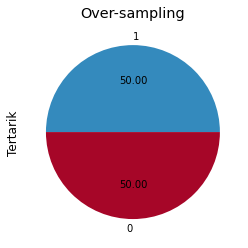

In [188]:
#ros = RandomOverSampler(sampling_strategy=1) # Float
ros = RandomOverSampler(sampling_strategy="not majority") # String
X_ros, y_ros = ros.fit_resample(dataTrain, y)

ax = y_ros.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

In [189]:
X_ros.shape

(300444, 10)

In [190]:
y_ros.shape

(300444,)

### export dataset ke csv untuk dicantumkan

In [191]:
dataExport_temp = X_ros.copy()
dataExport_temp['Tertarik'] = y_ros

In [192]:
dataExport_temp

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,0.153846,1.0,0.634615,1.0,1,1,0.047251,0.932099,0.301038,0
1,0,0.430769,1.0,0.750000,0.0,2,0,0.043104,0.172840,0.512111,0
2,1,0.584615,1.0,0.923077,0.0,0,1,0.000000,0.759259,0.183391,0
3,0,0.015385,1.0,0.673077,1.0,1,1,0.037402,0.932099,0.557093,0
4,1,0.000000,1.0,0.153846,1.0,1,1,0.052380,0.981481,0.072664,0
...,...,...,...,...,...,...,...,...,...,...,...
300439,0,0.076923,1.0,0.788462,0.0,1,0,0.048348,0.932099,0.027682,1
300440,1,0.600000,1.0,0.538462,0.0,0,0,0.061376,0.074074,0.671280,1
300441,0,0.492308,1.0,0.538462,0.0,2,0,0.074003,0.154321,0.567474,1
300442,0,0.615385,1.0,0.538462,0.0,0,0,0.061778,0.759259,0.934256,1


In [193]:
from google.colab import files

In [194]:
dataExport_temp.to_csv('kendaraan_trainNew.csv') 
files.download('kendaraan_trainNew.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### prepare data training and testing

In [195]:
# X_ros
# y_ros

dataTraining

In [196]:
y_training = y_ros.to_numpy()
data_training = X_ros.to_numpy()

In [197]:
# y_training
# data_training

dataTesting

In [198]:
y = dataTest['Tertarik']
dataTest = dataTest.drop('Tertarik', axis = 1)

In [199]:
y_testing = y.to_numpy()
data_testing = dataTest.to_numpy()

In [200]:
# y_testing
# data_Testing

## modeling

### random forest

In [138]:
from collections import Counter

import numpy as np


def entropy(y):
    hist = np.bincount(y)
    ps = hist / len(y)
    return -np.sum([p * np.log2(p) for p in ps if p > 0])


class Node:
    def __init__(
        self, feature=None, threshold=None, left=None, right=None, *, value=None
    ):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf_node(self):
        return self.value is not None


class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=100, n_feats=None):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_feats = n_feats
        self.root = None

    def fit(self, X, y):
        self.n_feats = X.shape[1] if not self.n_feats else min(self.n_feats, X.shape[1])
        self.root = self._grow_tree(X, y)

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))

        # stopping criteria
        if (
            depth >= self.max_depth
            or n_labels == 1
            or n_samples < self.min_samples_split
        ):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(n_features, self.n_feats, replace=False)

        # greedily select the best split according to information gain
        best_feat, best_thresh = self._best_criteria(X, y, feat_idxs)

        # grow the children that result from the split
        left_idxs, right_idxs = self._split(X[:, best_feat], best_thresh)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth + 1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth + 1)
        return Node(best_feat, best_thresh, left, right)

    def _best_criteria(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_thresh = None, None
        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)
            for threshold in thresholds:
                gain = self._information_gain(y, X_column, threshold)

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_thresh = threshold

        return split_idx, split_thresh

    def _information_gain(self, y, X_column, split_thresh):
        # parent loss
        parent_entropy = entropy(y)

        # generate split
        left_idxs, right_idxs = self._split(X_column, split_thresh)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0

        # compute the weighted avg. of the loss for the children
        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = entropy(y[left_idxs]), entropy(y[right_idxs])
        child_entropy = (n_l / n) * e_l + (n_r / n) * e_r

        # information gain is difference in loss before vs. after split
        ig = parent_entropy - child_entropy
        return ig

    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

    def _most_common_label(self, y):
        counter = Counter(y)
        most_common = counter.most_common(1)[0][0]
        return most_common

In [139]:
from collections import Counter

import numpy as np

def bootstrap_sample(X, y):
    n_samples = X.shape[0]
    idxs = np.random.choice(n_samples, n_samples, replace=True)
    return X[idxs], y[idxs]


def most_common_label(y):
    counter = Counter(y)
    most_common = counter.most_common(1)[0][0]
    return most_common


class RandomForest:
    def __init__(self, n_trees=10, min_samples_split=2, max_depth=100, n_feats=None):
        self.n_trees = n_trees
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_feats = n_feats
        self.trees = []

    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_trees):
            tree = DecisionTree(
                min_samples_split=self.min_samples_split,
                max_depth=self.max_depth,
                n_feats=self.n_feats,
            )
            X_samp, y_samp = bootstrap_sample(X, y)
            tree.fit(X_samp, y_samp)
            self.trees.append(tree)

    def predict(self, X):
        tree_preds = np.array([tree.predict(X) for tree in self.trees])
        tree_preds = np.swapaxes(tree_preds, 0, 1)
        y_pred = [most_common_label(tree_pred) for tree_pred in tree_preds]
        return np.array(y_pred)

In [140]:
clf = RandomForest(n_trees=3, max_depth=10)

In [ ]:
clf.fit(data_training, y_training) 

In [ ]:
y_pred_rf = clf.predict(data_testing)

In [ ]:
def accuracy(y_true, y_pred):
  accuracy = np.sum(y_true == y_pred) / len(y_true)
  return accuracy

In [ ]:
acc = accuracy(y_testing, y_pred_rf)

print("Accuracy:", acc)

Accuracy: 0.6935074203908562


### naive bayes

In [ ]:
import numpy as np


class NaiveBayes:
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)

        # calculate mean, var, and prior for each class
        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)
        self._priors = np.zeros(n_classes, dtype=np.float64)

        for idx, c in enumerate(self._classes):
            X_c = X[y == c]
            self._mean[idx, :] = X_c.mean(axis=0)
            self._var[idx, :] = X_c.var(axis=0)
            self._priors[idx] = X_c.shape[0] / float(n_samples)

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        posteriors = []

        # calculate posterior probability for each class
        for idx, c in enumerate(self._classes):
            prior = np.log(self._priors[idx])
            posterior = np.sum(np.log(self._pdf(idx, x)))
            posterior = prior + posterior
            posteriors.append(posterior)

        # return class with highest posterior probability
        return self._classes[np.argmax(posteriors)]

    def _pdf(self, class_idx, x):
        mean = self._mean[class_idx]
        var = self._var[class_idx]
        numerator = np.exp(-((x - mean) ** 2) / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator

In [ ]:
nb = NaiveBayes()
nb.fit(data_training, y_training)

In [ ]:
%%time
y_pred_nb = nb.predict(data_testing)

CPU times: user 4.73 s, sys: 434 ms, total: 5.16 s
Wall time: 4.34 s


In [ ]:
def accuracy(y_true, y_pred):
  accuracy = np.sum(y_true == y_pred) / len(y_true)
  return accuracy

In [ ]:
acc = accuracy(y_testing, y_pred_nb)

print("Accuracy:", acc)

Accuracy: 0.6395600243497974


### logistic regression

In [ ]:
import numpy as np


class LogisticRegression:
    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent
        for _ in range(self.n_iters):
            # approximate y with linear combination of weights and x, plus bias
            linear_model = np.dot(X, self.weights) + self.bias
            # apply sigmoid function
            y_predicted = self._sigmoid(linear_model)

            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

In [ ]:
%%time
regressor = LogisticRegression(learning_rate=0.0001, n_iters=1000)
regressor.fit(data_training, y_training)

CPU times: user 21.2 s, sys: 11.4 s, total: 32.6 s
Wall time: 16.8 s


In [ ]:
def accuracy(y_true, y_pred):
  accuracy = np.sum(y_true == y_pred) / len(y_true)
  return accuracy

In [ ]:
y_pred_lr = regressor.predict(data_testing)

print("LR classification accuracy:", accuracy(y_testing, y_pred_lr))

LR classification accuracy: 0.839963055479754


## hasil

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# random forest
accuracy_rf = accuracy_score(y_testing, y_pred_rf)
precision_rf = precision_score(y_testing, y_pred_rf)
recall_rf =  recall_score(y_testing, y_pred_rf)
f1_rf = f1_score(y_testing, y_pred_rf)
print("evaluasi random forrest")
print('accuracy_random_Forest : %.3f' %accuracy_rf)
print('precision_random_Forest : %.3f' %precision_rf)
print('recall_random_Forest : %.3f' %recall_rf)
print('f1-score_random_Forest : %.3f' %f1_rf)

evaluasi random forrest
accuracy_random_Forest : 0.694
precision_random_Forest : 0.277
recall_random_Forest : 0.928
f1-score_random_Forest : 0.427


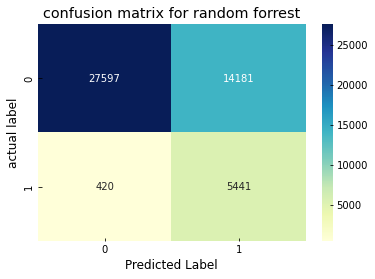

In [ ]:
# confusion matrix random forrest
cm = confusion_matrix(y_testing, y_pred_rf)
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('confusion matrix for random forrest')
plt.xlabel('Predicted Label')
plt.ylabel('actual label')
plt.show()

In [ ]:
# naive bayes
accuracy_nb = accuracy_score(y_testing, y_pred_nb)
precision_nb = precision_score(y_testing, y_pred_nb)
recall_nb =  recall_score(y_testing, y_pred_nb)
f1_nb = f1_score(y_testing, y_pred_nb)
print("evaluasi naive bayes")
print('accuracy_random_Forest : %.3f' %accuracy_nb)
print('precision_random_Forest : %.3f' %precision_nb)
print('recall_random_Forest : %.3f' %recall_nb)
print('f1-score_random_Forest : %.3f' %f1_nb)

evaluasi naive bayes
accuracy_random_Forest : 0.640
precision_random_Forest : 0.251
recall_random_Forest : 0.975
f1-score_random_Forest : 0.400


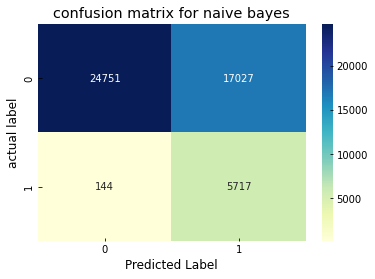

In [ ]:
# confusion matrix naive bayes
cm = confusion_matrix(y_testing, y_pred_nb)
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('confusion matrix for naive bayes')
plt.xlabel('Predicted Label')
plt.ylabel('actual label')
plt.show()

In [ ]:
# logistic regression
accuracy_lr = accuracy_score(y_testing, y_pred_lr)
precision_lr = precision_score(y_testing, y_pred_lr)
recall_lr =  recall_score(y_testing, y_pred_lr)
f1_lr = f1_score(y_testing, y_pred_lr)
print('accuracy_random_Forest : %.3f' %accuracy_lr)
print('precision_random_Forest : %.3f' %precision_lr)
print('recall_random_Forest : %.3f' %recall_lr)
print('f1-score_random_Forest : %.3f' %f1_lr)

accuracy_random_Forest : 0.840
precision_random_Forest : 0.278
recall_random_Forest : 0.188
f1-score_random_Forest : 0.225


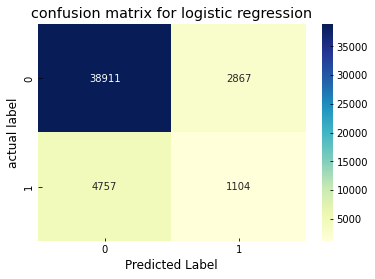

In [ ]:
# confusion matrix logistic regression
cm = confusion_matrix(y_testing, y_pred_lr)
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('confusion matrix for logistic regression')
plt.xlabel('Predicted Label')
plt.ylabel('actual label')
plt.show()

In [ ]:
data = {"actual" : y_testing,
        "prediction_rf" : y_pred_rf,
        "prediction_nb" : y_pred_nb,
        "prediction_lr" : y_pred_lr}

temp = pd.DataFrame(data)
temp.sample(10)

,actual,prediction_rf,prediction_nb,prediction_lr
8701,0,1,1,0
37533,0,0,0,0
44136,0,0,0,0
21444,1,1,1,0
9452,0,1,1,1
28072,0,0,0,0
3289,0,1,1,0
42432,0,1,1,0
14041,0,0,0,0
6442,1,1,1,0


#### overfitting ~ accuracy training > accuracy valid

In [ ]:
# analisis model random forrest
rf_testing = accuracy_score(y_testing, y_pred_rf)
rf_training = accuracy_score(clf.predict(data_training), y_training)

print("analisis random forrest")
print("akurasi pada data training " , rf_training)
print("akurasi pada data testing : ", rf_testing)

analisis random forrest
akurasi pada data training  0.8030315133602268
akurasi pada data testing :  0.6935074203908562


In [ ]:
# analisis model naive bayes
nb_testing = accuracy_score(y_testing, y_pred_nb)
nb_training = accuracy_score(nb.predict(data_training), y_training)

print("analisis naive bayes")
print("akurasi pada data training " , nb_training)
print("akurasi pada data testing : ", nb_testing)

analisis naive bayes
akurasi pada data training  0.7844856279373195
akurasi pada data testing :  0.6395600243497974


In [ ]:
# analisis model logistic regression
lr_testing = accuracy_score(y_testing, y_pred_lr)
lr_training = accuracy_score(regressor.predict(data_training), y_training)

print("analisis logistic regression")
print("akurasi pada data training " , lr_training)
print("akurasi pada data testing : ", lr_testing)

analisis logistic regression
akurasi pada data training  0.5620947664123763
akurasi pada data testing :  0.839963055479754
